1. Cargue el dataset en un dataframe de pandas, muestre un ejemplo de cinco observaciones.

In [62]:
import pandas as pd


file_path = "dataset_pishing.csv" 
df = pd.read_csv(file_path)

# Primeras cinco observaciones
print(df.head())


                                                 url      status
0              http://www.crestonwood.com/router.php  legitimate
1  http://shadetreetechnology.com/V4/validation/a...    phishing
2  https://support-appleld.com.secureupdate.duila...    phishing
3                                 http://rgipt.ac.in  legitimate
4  http://www.iracing.com/tracks/gateway-motorspo...  legitimate


2. Muestre la cantidad de observaciones etiquetadas en la columna status como “legit” y como
“pishing”. ¿Está balanceado el dataset?


In [63]:
import pandas as pd



# Contar las observaciones de "status"
status_counts = df["status"].value_counts()


balance_ratio = status_counts.min() / status_counts.max()

print(status_counts)
print(f"\nEl dataset está balanceado: {'Sí' if balance_ratio == 1.0 else 'No'}")


status
legitimate    5715
phishing      5715
Name: count, dtype: int64

El dataset está balanceado: Sí


# Derivación de características

1. ¿Qué ventajas tiene el análisis de una URL contra el análisis de otros datos, cómo el tiempo
de vida del dominio, o las características de la página Web?

El análisis de URLs presenta varias ventajas importantes frente a otros métodos de detección de phishing, como la evaluación del tiempo de vida del dominio o el análisis del contenido de la página web.

Detección en tiempo real y ataques de "zero-hour"
A diferencia de las listas negras o del análisis del tiempo de vida del dominio, el análisis de URLs permite identificar ataques de phishing en el momento en que aparecen, sin necesidad de que hayan sido reportados previamente. Esto es clave para detectar ataques recientes que aún no figuran en bases de datos de amenazas conocidas.

Independencia del contenido de la página
No es necesario acceder, descargar o renderizar la página web para analizarla, lo que reduce el riesgo de interactuar con contenido malicioso y hace que el proceso de detección sea más rápido y eficiente. Esto también evita que los atacantes oculten código dañino mediante técnicas de carga dinámica de contenido.

Detección sin depender de servicios de terceros
Métodos basados en listas negras, como Google Safe Browsing, o en la antigüedad del dominio requieren acceso a fuentes externas, lo que puede implicar latencia o limitaciones en su disponibilidad. En cambio, el análisis de URLs puede realizarse de manera autónoma, lo que lo convierte en una opción más flexible y confiable.

Menor consumo de recursos computacionales
Analizar las características de una URL, como su longitud, la presencia de caracteres especiales o la estructura del dominio, es un proceso mucho más ligero en comparación con la evaluación completa del contenido de una página web. Esto permite implementar soluciones de detección más eficientes sin comprometer el rendimiento del sistema.

Mayor resistencia ante técnicas evasivas
Los atacantes suelen modificar el contenido de las páginas, aplicar técnicas de ofuscación o cambiar el diseño visual para evadir los sistemas de detección basados en el contenido. Sin embargo, las URLs utilizadas en ataques de phishing siguen patrones predecibles, lo que facilita su identificación sin importar cómo luzca la página web final.

En resumen, el análisis de URLs es una técnica poderosa para la detección de phishing debido a su rapidez, eficiencia y capacidad de adaptación ante nuevas amenazas, sin depender de bases de datos externas o de la evaluación del contenido de las páginas web.

2. ¿Qué características de una URL son más prometedoras para la detección de phishing?

El análisis de URLs ha demostrado ser una técnica altamente efectiva para la detección de phishing, gracias a la identificación de patrones y características sospechosas que suelen estar presentes en estos ataques. Entre los principales indicadores de una URL maliciosa se encuentran:

Longitud de la URL
Los sitios de phishing tienden a utilizar URLs más largas de lo normal con el fin de ocultar el dominio real dentro de subdominios o directorios engañosos. Una URL excesivamente larga puede ser un indicio de una posible amenaza.

Uso de caracteres especiales y entropía de caracteres no alfanuméricos
Caracteres como "-", "_", "@", "//" y otros símbolos especiales son comúnmente utilizados para engañar a los usuarios y hacer que la URL parezca legítima. El nivel de entropía en estos caracteres es una métrica clave para distinguir URLs de phishing de aquellas legítimas.

Presencia de direcciones IP en la URL
Una URL que contiene una dirección IP en lugar de un dominio registrado es un fuerte indicio de phishing. Los sitios legítimos suelen utilizar nombres de dominio bien establecidos en lugar de direcciones IP numéricas.

Uso de subdominios sospechosos
Los atacantes pueden estructurar las URLs de manera que imiten sitios legítimos, utilizando múltiples subdominios para confundir a los usuarios. Por ejemplo, una URL como login.bank-secure.example.com puede parecer auténtica, pero el dominio real es example.com, lo que indica una posible amenaza.

Uso de palabras clave engañosas
Palabras como "secure", "login", "account", "verify" y "banking" suelen ser empleadas en URLs fraudulentas para generar confianza en la víctima y hacer que caiga en el engaño. La presencia de estas palabras en una URL debe ser analizada con precaución.

TLDs y dominios sospechosos
Los sitios de phishing a menudo emplean dominios de nivel superior (TLDs) menos comunes o gratuitos, como .tk, .cf, .ga, ya que estos suelen estar asociados con actividades maliciosas. Analizar el TLD de una URL es una técnica útil para detectar posibles fraudes.

Presencia de acortadores de URL
Servicios como bit.ly o tinyurl pueden ser utilizados para ocultar la verdadera dirección de un sitio malicioso, lo que dificulta que el usuario identifique una amenaza antes de hacer clic en el enlace.

# En base a la respuesta anterior escriba al menos quince funciones basadas en los artículos, para derivar características que un modelo pueda utilizar y añada dichas características al dataset original. Incluya dentro de las quince funciones, la entropía de Shanon y relativa

In [64]:
import pandas as pd
import re
import math
from urllib.parse import urlparse



def url_length(url):
    """Devuelve la longitud de la URL."""
    return len(url)

def count_special_chars(url):
    """Cuenta la cantidad de caracteres especiales en la URL."""
    return len(re.findall(r'[^a-zA-Z0-9]', url))

def count_digits(url):
    """Cuenta la cantidad de dígitos en la URL."""
    return len(re.findall(r'\d', url))

def count_subdomains(url):
    """Cuenta la cantidad de subdominios en la URL."""
    domain = urlparse(url).netloc
    return domain.count('.')

def count_hyphens(url):
    """Cuenta la cantidad de guiones en la URL."""
    return url.count('-')

def has_ip_address(url):
    """Verifica si la URL contiene una dirección IP en lugar de un dominio."""
    return int(bool(re.match(r'http[s]?://(?:[0-9]{1,3}\.){3}[0-9]{1,3}', url)))

def count_at_symbol(url):
    """Cuenta el número de '@' en la URL."""
    return url.count('@')

def count_double_slash(url):
    """Cuenta la cantidad de '//', lo que puede indicar una redirección sospechosa."""
    return url.count('//')

def count_suspicious_words(url):
    """Cuenta la cantidad de palabras sospechosas en la URL."""
    suspicious_words = ['secure', 'login', 'account', 'verify', 'banking', 'update', 'free', 'click', 'confirm']
    return sum(1 for word in suspicious_words if word in url.lower())

def tld_suspicious(url):
    """Verifica si el TLD está entre los considerados sospechosos."""
    suspicious_tlds = ['.tk', '.cf', '.ga', '.ml', '.gq']
    parsed_url = urlparse(url)
    tld = parsed_url.netloc.split('.')[-1]
    return int(tld in suspicious_tlds)

def is_shortened(url):
    """Verifica si la URL usa un servicio de acortamiento."""
    shorteners = ['bit.ly', 'tinyurl', 'goo.gl', 't.co', 'ow.ly', 'is.gd']
    domain = urlparse(url).netloc
    return int(domain in shorteners)

def count_parameters(url):
    """Cuenta la cantidad de parámetros en la URL."""
    return url.count('?')

def shannon_entropy(url):
    """Calcula la entropía de Shannon de la URL."""
    freq = {char: url.count(char) / len(url) for char in set(url)}
    return -sum(f * math.log2(f) for f in freq.values())

def relative_entropy(url):
    """Calcula la entropía relativa (normalizada) de la URL."""
    max_entropy = math.log2(len(url)) if len(url) > 0 else 1
    return shannon_entropy(url) / max_entropy



# Aplicar las funciones al dataset
df["url_length"] = df["url"].apply(url_length)
df["special_chars_count"] = df["url"].apply(count_special_chars)
df["digits_count"] = df["url"].apply(count_digits)
df["subdomains_count"] = df["url"].apply(count_subdomains)
df["hyphens_count"] = df["url"].apply(count_hyphens)
df["has_ip_address"] = df["url"].apply(has_ip_address)
df["at_symbol_count"] = df["url"].apply(count_at_symbol)
df["double_slash_count"] = df["url"].apply(count_double_slash)
df["suspicious_words_count"] = df["url"].apply(count_suspicious_words)
df["suspicious_tld"] = df["url"].apply(tld_suspicious)
df["is_shortened"] = df["url"].apply(is_shortened)
df["parameters_count"] = df["url"].apply(count_parameters)
df["shannon_entropy"] = df["url"].apply(shannon_entropy)
df["relative_entropy"] = df["url"].apply(relative_entropy)

# Dataset con las características extraídas
df.to_csv("dataset_pishing_features.csv", index=False)


df.head()


,url,status,url_length,special_chars_count,digits_count,subdomains_count,hyphens_count,has_ip_address,at_symbol_count,double_slash_count,suspicious_words_count,suspicious_tld,is_shortened,parameters_count,shannon_entropy,relative_entropy
0,http://www.crestonwood.com/router.php,legitimate,37,7,0,2,0,0,0,1,0,0,0,0,3.787043,0.726956
1,http://shadetreetechnology.com/V4/validation/a...,phishing,77,7,17,1,0,0,0,1,0,0,0,0,4.419864,0.705284
2,https://support-appleld.com.secureupdate.duila...,phishing,126,19,19,4,1,0,0,1,2,0,0,1,4.753412,0.681270
3,http://rgipt.ac.in,legitimate,18,5,0,2,0,0,0,1,0,0,0,0,3.461320,0.830068
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,55,10,0,2,2,0,0,1,0,0,0,0,4.097662,0.708771


# Preprocesamiento

In [ ]:

import pandas as pd

# Convertir la variable categórica "status" en binaria
df["status"] = df["status"].map({"legitimate": 0, "phishing": 1})

# Eliminar la columna del dominio si existe
if "url" in df.columns:
    df = df.drop(columns=["url"])

# Manejo de valores nulos
df = df.dropna()  # Eliminar filas con valores nulos

# Convertir otras variables categóricas a numéricas si hay más columnas categóricas
categorical_columns = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Guardar el dataset limpio (opcional)
df.to_csv("dataset_limpio.csv", index=False)

# Mostrar un resumen de los datos procesados
print(df.head())
print("\nInformación del dataset:\n")
print(df.info())


   status  url_length  special_chars_count  digits_count  subdomains_count  \
0       0          37                    7             0                 2   
1       1          77                    7            17                 1   
2       1         126                   19            19                 4   
3       0          18                    5             0                 2   
4       0          55                   10             0                 2   

   hyphens_count  has_ip_address  at_symbol_count  double_slash_count  \
0              0               0                0                   1   
1              0               0                0                   1   
2              1               0                0                   1   
3              0               0                0                   1   
4              2               0                0                   1   

   suspicious_words_count  suspicious_tld  is_shortened  parameters_count  \
0              

## Selección de Características
En la exploración de datos, determine las columnas que son constantes, o que no tienen una varianza
alta con la columna status. Elimine las características repetidas o irrelevantes para la clasificación de
un sitio de phishing. Verifique que no posee observaciones repetidas. Apóyese con la visualización de
características y correlación para seleccionar las características más importantes para clasificar una
URL legítima de una URL de phishing.
3. ¿Qué columnas o características fueron seleccionadas y por qué?

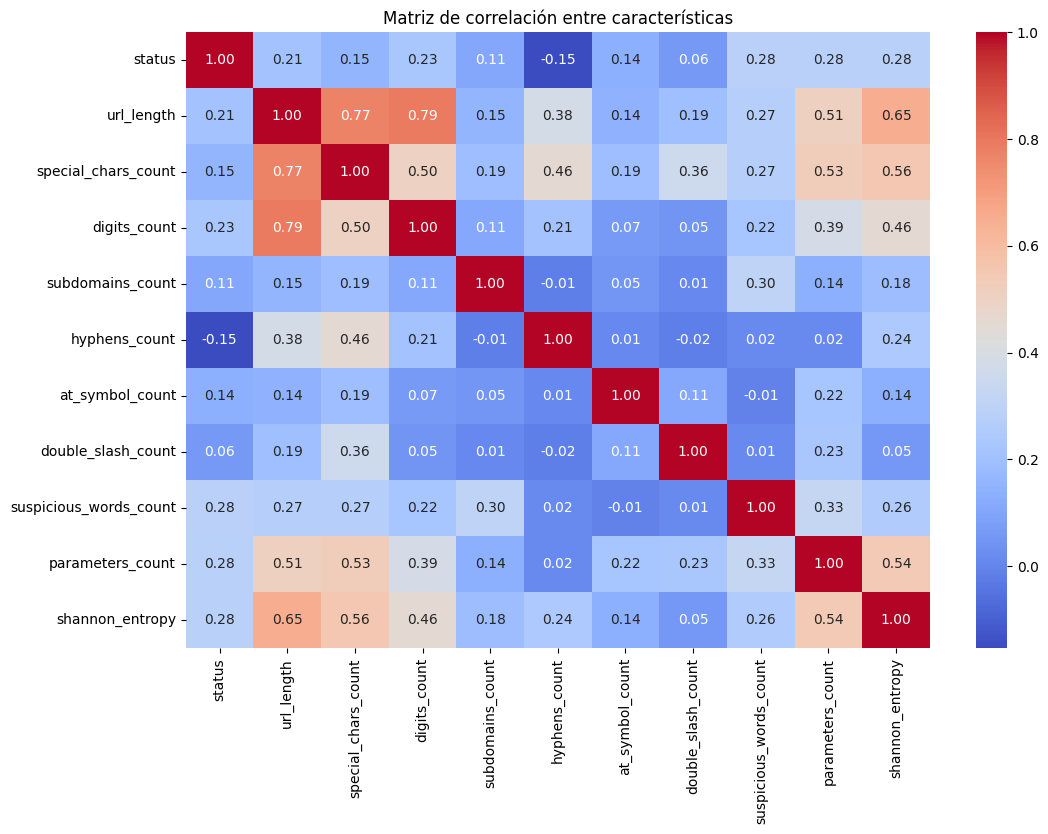

Características seleccionadas: ['status', 'suspicious_words_count', 'parameters_count', 'shannon_entropy', 'digits_count', 'url_length', 'hyphens_count', 'special_chars_count', 'at_symbol_count', 'subdomains_count']


,status,suspicious_words_count,parameters_count,shannon_entropy,digits_count,url_length,hyphens_count,special_chars_count,at_symbol_count,subdomains_count
0,0,0,0,3.787043,0,37,0,7,0,2
1,1,0,0,4.419864,17,77,0,7,0,1
2,1,2,1,4.753412,19,126,1,19,0,4
3,0,0,0,3.461320,0,18,0,5,0,2
4,0,0,0,4.097662,0,55,2,10,0,2


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



constant_columns = [col for col in df.columns if df[col].nunique() == 1]


variance = df.var()


low_variance_columns = variance[variance < 0.01].index.tolist()
df_filtered = df.drop(columns=constant_columns + low_variance_columns, errors='ignore')
df_filtered = df_filtered.drop_duplicates()


plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre características")
plt.show()

if 'status' in df_filtered.columns:
    correlation_with_target = df_filtered.corr()['status'].abs().sort_values(ascending=False)
    selected_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()
    df_selected = df_filtered[selected_features]
else:
    selected_features = df_filtered.columns.tolist()
    df_selected = df_filtered

print("Características seleccionadas:", selected_features)
df_selected.head()


## Características seleccionadas y su importancia

### 1. status
- Es la **variable objetivo**, que indica si la URL es legítima o de phishing.

### 2. suspicious_words_count
- Cantidad de **palabras sospechosas** en la URL, como `"secure"`, `"login"`, `"account"`, `"verify"`, `"banking"`, `"update"`, `"free"`, `"click"`, `"confirm"`.
- Estas palabras suelen ser utilizadas en URLs de phishing para engañar a los usuarios.

### 3. parameters_count
- Número de **parámetros en la URL**.
- Un alto número de parámetros puede indicar un intento de **redireccionamiento malicioso** o **tracking no seguro**.

### 4. shannon_entropy
- **Entropía de Shannon**, que mide la aleatoriedad de los caracteres en la URL.
- Las URLs de phishing tienden a tener **mayor entropía** porque suelen incluir cadenas de caracteres aleatorias para evadir detección.

### 5. digits_count
- Cantidad de **dígitos en la URL**.
- Los atacantes a menudo agregan números para **imitar dominios legítimos** o **evadir filtros de seguridad**.

### 6. url_length
- **Longitud total de la URL**.
- Las URLs de phishing tienden a ser **más largas**, ya que incluyen múltiples **subdirectorios y parámetros** para engañar a los usuarios.

### 7. hyphens_count
- Número de **guiones (`-`) en la URL**.
- Los sitios de phishing suelen usar guiones para hacer que una URL parezca más confiable o para **segmentar palabras clave**.

### 8. special_chars_count
- Número de **caracteres especiales** en la URL (*!, @, #, $, %, etc.*).
- Los atacantes pueden usar estos caracteres para hacer que las URLs **parezcan más legítimas** o para **evadir detección**.

### 9. at_symbol_count
- Número de veces que aparece el **símbolo `@` en la URL**.
- En URLs legítimas, el `@` rara vez se usa, pero en URLs de phishing puede ser utilizado para **redirecciones engañosas**.

### 10. subdomains_count
- Número de **subdominios en la URL**.
- Los atacantes suelen agregar varios subdominios para hacer que la URL parezca más confiable, como:
  - `secure-login.mybank.com.phishing.com`.

---

## ¿Por qué fueron seleccionadas estas características?

###  **1. Alta correlación con la variable `status`**
- Se seleccionaron características con **correlaciones mayores a 0.1** con `status`, lo que indica que pueden influir en la clasificación.

###  **2. Eliminación de características con baja varianza**
- Se descartaron columnas que **no variaban** entre las observaciones, ya que no aportaban información útil al modelo.

###  **3. Evidencia en estudios previos**
- La selección está basada en investigaciones previas sobre **detección de phishing**, donde estas características han demostrado ser **efectivas**.

Este conjunto de características ayuda a **mejorar la precisión del modelo** de detección de phishing, eliminando **datos redundantes o irrelevantes**



# Separación de Datos

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["status"])
y = df["status"]

# División de los datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

# Guardar en archivos CSV
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Implementación

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
df_X_train = pd.read_csv("X_train.csv")
df_y_train = pd.read_csv("y_train.csv")
df_X_val = pd.read_csv("X_val.csv")
df_y_val = pd.read_csv("y_val.csv")
df_X_test = pd.read_csv("X_test.csv")
df_y_test = pd.read_csv("y_test.csv")

le = LabelEncoder()
df_y_train = le.fit_transform(df_y_train.values.ravel())
df_y_val = le.transform(df_y_val.values.ravel())
df_y_test = le.transform(df_y_test.values.ravel())


Entrenar


Evaluación en Validación:
Matriz de Confusión:
[[699 158]
 [150 707]]
Precisión: 0.8173
Recall: 0.8250
AUC: 0.8931


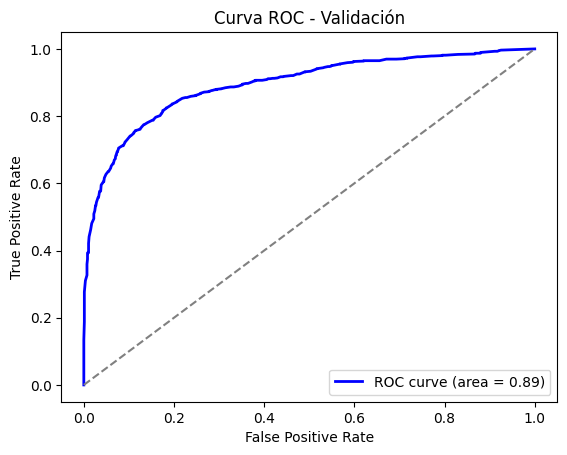


Evaluación en Prueba:
Matriz de Confusión:
[[1361  354]
 [ 303 1412]]
Precisión: 0.7995
Recall: 0.8233
AUC: 0.8919


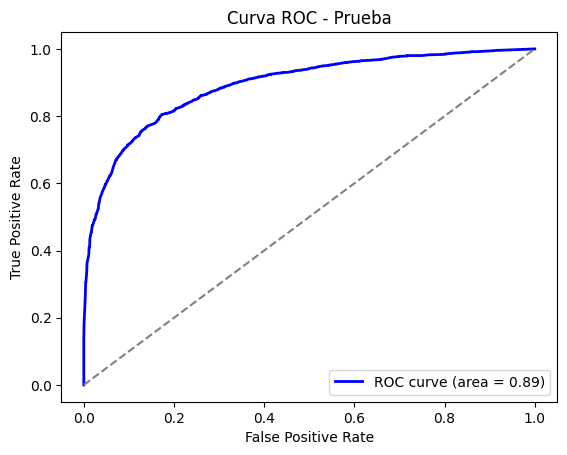

In [69]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df_X_train, df_y_train)
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    
    # Calcular métricas
    cm = confusion_matrix(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Mostrar métricas
    print(f"\nEvaluación en {dataset_name}:")
    print("Matriz de Confusión:")
    print(cm)
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    
    # Graficar Curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {dataset_name}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluar en datos de validación y prueba
evaluate_model(model, df_X_val, df_y_val, "Validación")
evaluate_model(model, df_X_test, df_y_test, "Prueba")

# Discusión

4. **Impacto de clasificar un sitio legítimo como phishing (FP):**  
Genera pérdida de confianza en el sistema, pérdida de clientes/ingresos, y frustración para los usuarios.

5. **Impacto de clasificar un sitio de phishing como legítimo (FN):**  
Conduce a riesgos de fraude, robo de datos, compromete la seguridad y afecta la reputación del sistema.

6. **Métrica más adecuada para comparar modelos de clasificación de phishing:**  
El **Recall** es la métrica más relevante porque prioriza la detección de phishing (minimiza los FN). La **AUC-ROC** puede ser útil para un balance entre precisión y recall.